In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

1. Exploration et Visualisation des Données (EDA)

1.1. Lecture et fusion de tous les CSV

 1.1.1. Lecture de tous les CSV dans un dossier

In [3]:
sns.set(style="whitegrid")
folder_path = "/Users/cyrileopposite/Desktop/Python/machine_learning/projet/categories"
csv_files = [f for f in os.listdir(folder_path) if f.endswith(".csv")]
df_list = []
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    temp_df = pd.read_csv(file_path)
    df_list.append(temp_df)

df_combined = pd.concat(df_list, axis=0, ignore_index=True)
df_combined.info()
df_combined.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551585 entries, 0 to 551584
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            551585 non-null  object
 1   main_category   551585 non-null  object
 2   sub_category    551585 non-null  object
 3   image           551585 non-null  object
 4   link            551585 non-null  object
 5   ratings         375791 non-null  object
 6   no_of_ratings   375791 non-null  object
 7   discount_price  490422 non-null  object
 8   actual_price    533772 non-null  object
dtypes: object(9)
memory usage: 37.9+ MB


,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,Skybags Treble-FIFA 68cm Printed Polycarbonate...,bags & luggage,Suitcases & Trolley Bags,https://m.media-amazon.com/images/I/71C5GfgxW2...,https://www.amazon.in/Skybags-Treble-FIFA-Prin...,4.5,2,"₹7,250","₹14,500"
1,Tommy Hilfiger Plastic Hard 66 cms Luggage (89...,bags & luggage,Suitcases & Trolley Bags,https://m.media-amazon.com/images/I/41lIioNQ3N...,https://www.amazon.in/Tommy-Hilfiger-Luggage-8...,3.6,70,"₹6,399","₹7,999"
2,Samsonite Polyester Hard 68 Cms Luggage- Suitc...,bags & luggage,Suitcases & Trolley Bags,https://m.media-amazon.com/images/I/71XSVc5fxg...,https://www.amazon.in/Samsonite-Polyester-Lugg...,4.0,5,"₹12,220","₹18,800"
3,Skybags Polycarbonate Hard 21 Cms Suitcase(_Blue),bags & luggage,Suitcases & Trolley Bags,https://m.media-amazon.com/images/I/51euSZMWAn...,https://www.amazon.in/Skybags-Combo-Polycarbon...,4.4,66,"₹6,648","₹10,043.04"
4,Skybags Game-ON FIFA 79cm Printed Polycarbonat...,bags & luggage,Suitcases & Trolley Bags,https://m.media-amazon.com/images/I/710caoNQ4X...,https://www.amazon.in/Skybags-Printed-Polycarb...,4.3,5,"₹6,850","₹17,400"


1.2. Nettoyage et transformation (prétraitement)

1.2.1. Suppression d'une colonne inutile

In [4]:
# Supprimer la colonne "Unnamed: 0"
if "Unnamed: 0" in df_combined.columns:
    df_combined = df_combined.drop(columns=["Unnamed: 0"])

1.2.2. Conversion et nettoyage des colonnes numériques

In [5]:
# Nettoyage des colonnes de prix
def nettoyer_prix(x):
    try:
        # Enlève le symbole ₹, les virgules et les espaces superflus
        x = x.replace('₹', '').replace(',', '').strip()
        return float(x)
    except:
        return np.nan

df_combined['discount_price'] = df_combined['discount_price'].astype(str).apply(nettoyer_prix)
df_combined['actual_price'] = df_combined['actual_price'].astype(str).apply(nettoyer_prix)

df_combined['ratings'] = pd.to_numeric(df_combined['ratings'], errors='coerce')
df_combined['no_of_ratings'] = pd.to_numeric(df_combined['no_of_ratings'], errors='coerce')

df_combined[['discount_price', 'actual_price', 'ratings', 'no_of_ratings']].head()

,discount_price,actual_price,ratings,no_of_ratings
0,7250.0,14500.00,4.5,2.0
1,6399.0,7999.00,3.6,70.0
2,12220.0,18800.00,4.0,5.0
3,6648.0,10043.04,4.4,66.0
4,6850.0,17400.00,4.3,5.0


1.2.3. Calcule du pourcentage de réduction

In [6]:
# Calcule la réduction en pourcentage à partir de actual_price et discount_price
df_combined['reduction_percent'] = ((df_combined['actual_price'] - df_combined['discount_price']) / df_combined['actual_price']) * 100
df_combined[['actual_price', 'discount_price', 'reduction_percent']].head()

,actual_price,discount_price,reduction_percent
0,14500.00,7250.0,50.000000
1,7999.00,6399.0,20.002500
2,18800.00,12220.0,35.000000
3,10043.04,6648.0,33.804904
4,17400.00,6850.0,60.632184


1.3. Analyse statistique descriptive


1.3.1. Affichage de statistiques descriptives

In [7]:
# Statistiques descriptives pour les colonnes numériques importantes
df_combined[['actual_price', 'discount_price', 'reduction_percent', 'ratings', 'no_of_ratings']].describe()

,actual_price,discount_price,reduction_percent,ratings,no_of_ratings
count,5.337720e+05,4.904220e+05,490422.000000,369558.000000,339029.000000
mean,2.311128e+04,2.623161e+03,49.256844,3.832311,88.908810
std,1.355082e+07,9.458196e+03,21.399939,0.756102,171.958778
min,0.000000e+00,8.000000e+00,0.000529,1.000000,1.000000
25%,9.900000e+02,3.890000e+02,35.025018,3.500000,4.000000
50%,1.599000e+03,6.790000e+02,50.187735,3.900000,15.000000
75%,2.999000e+03,1.399000e+03,65.843896,4.300000,79.000000
max,9.900000e+09,1.249990e+06,99.999994,5.000000,999.000000


1.3.2. Distribution des prix et du pourcentage de réduction

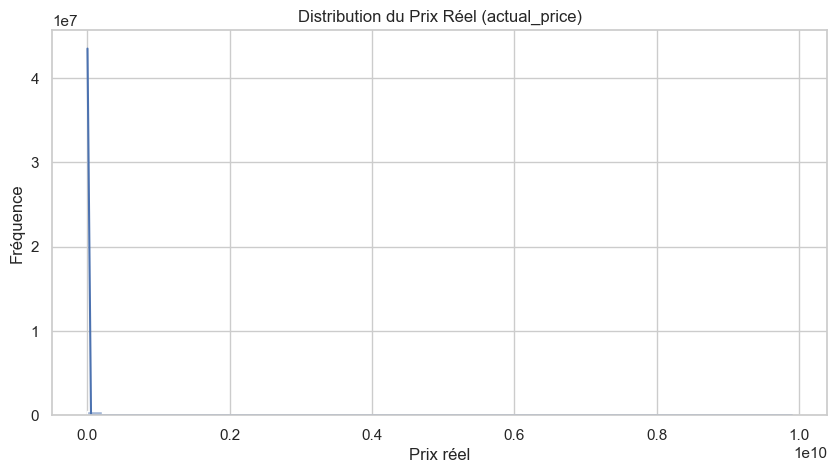

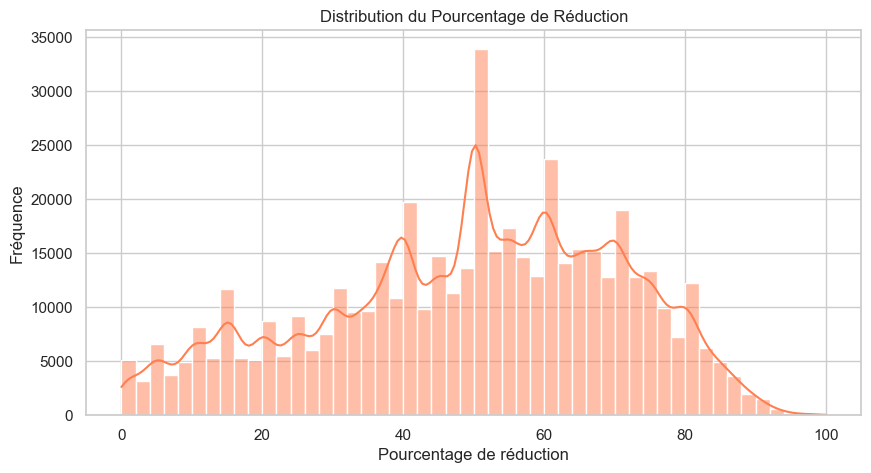

In [8]:
sns.set(style="whitegrid")

# Distribution du prix réel (actual_price)
plt.figure(figsize=(10, 5))
sns.histplot(df_combined['actual_price'].dropna(), bins=50, kde=True)
plt.title("Distribution du Prix Réel (actual_price)")
plt.xlabel("Prix réel")
plt.ylabel("Fréquence")
plt.show()

# Distribution du pourcentage de réduction (reduction_percent)
plt.figure(figsize=(10, 5))
sns.histplot(df_combined['reduction_percent'].dropna(), bins=50, kde=True, color='coral')
plt.title("Distribution du Pourcentage de Réduction")
plt.xlabel("Pourcentage de réduction")
plt.ylabel("Fréquence")
plt.show()

1.4) Visualisations avancées

1.4.1) Relations entre variables

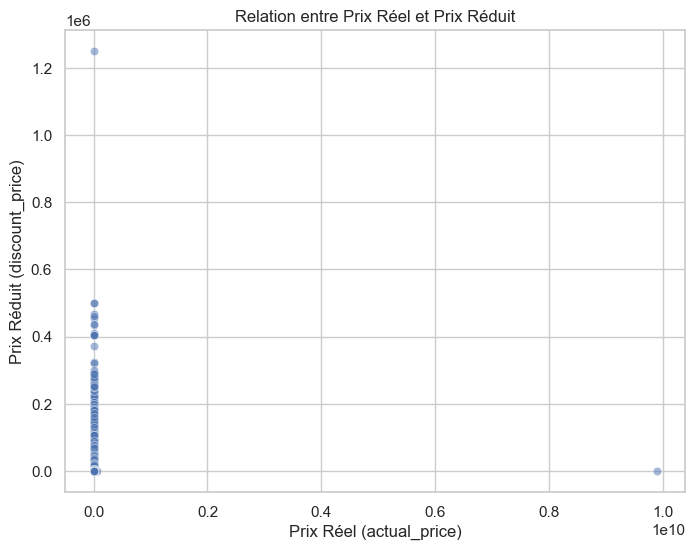

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='actual_price', y='discount_price', data=df_combined, alpha=0.5)
plt.title("Relation entre Prix Réel et Prix Réduit")
plt.xlabel("Prix Réel (actual_price)")
plt.ylabel("Prix Réduit (discount_price)")
plt.show()

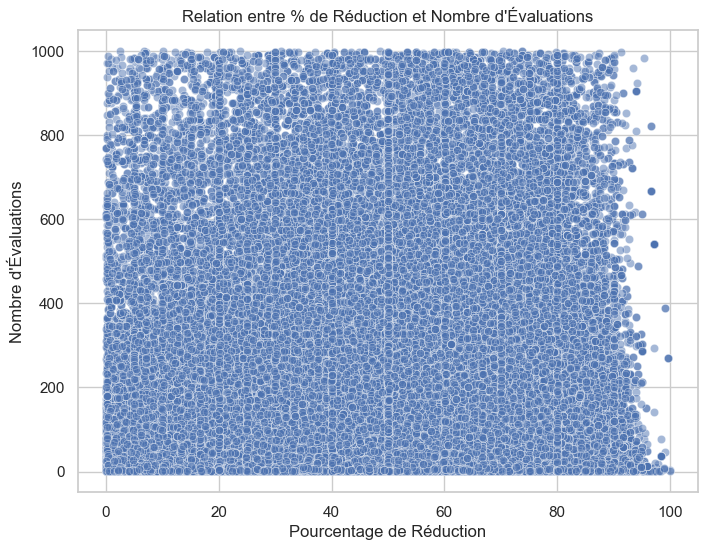

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='reduction_percent', y='no_of_ratings', data=df_combined, alpha=0.5)
plt.title("Relation entre % de Réduction et Nombre d'Évaluations")
plt.xlabel("Pourcentage de Réduction")
plt.ylabel("Nombre d'Évaluations")
plt.show()

1.4.2) Visualisation de la répartition par catégorie

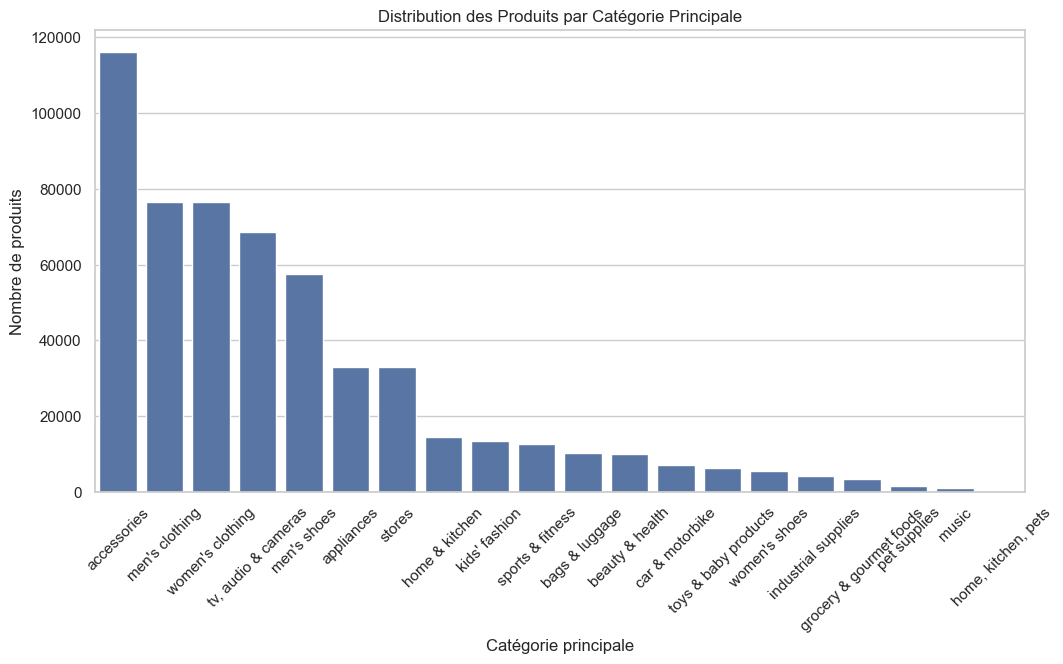

In [11]:
plt.figure(figsize=(12, 6))
# On affiche les catégories par ordre décroissant du nombre de produits
sns.countplot(data=df_combined, x='main_category',
              order=df_combined['main_category'].value_counts().index)
plt.title("Distribution des Produits par Catégorie Principale")
plt.xlabel("Catégorie principale")
plt.ylabel("Nombre de produits")
plt.xticks(rotation=45)
plt.show()

1.4.3) Matrice de corrélation entre variables numériques

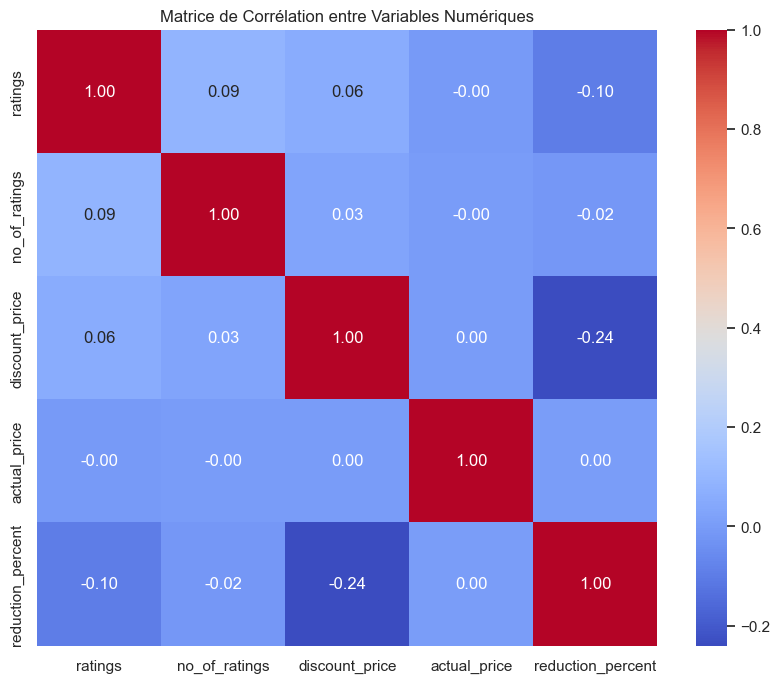

In [12]:
plt.figure(figsize=(10, 8))
correlation_matrix = df_combined[['ratings', 'no_of_ratings', 'discount_price',
                                  'actual_price', 'reduction_percent']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de Corrélation entre Variables Numériques")
plt.show()


1.5) Analyse additionnelle

1.5.1) Distribution des ratings

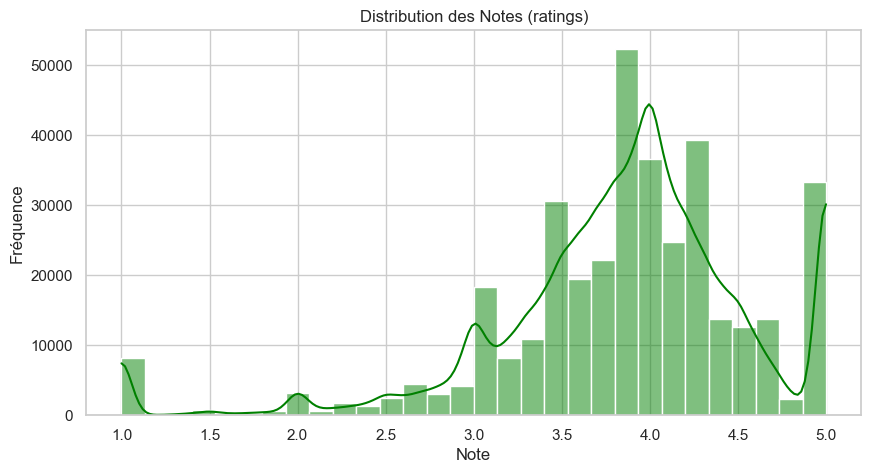

In [13]:
plt.figure(figsize=(10, 5))
sns.histplot(df_combined['ratings'].dropna(), bins=30, kde=True, color='green')
plt.title("Distribution des Notes (ratings)")
plt.xlabel("Note")
plt.ylabel("Fréquence")
plt.show()

1.5.2) Analyse de la longueur des descriptions

In [14]:
if 'description' in df_combined.columns:
    df_combined['description_length'] = df_combined['description'].apply(lambda x: len(str(x)))
    plt.figure(figsize=(10, 5))
    sns.histplot(df_combined['description_length'], bins=50, kde=True, color='purple')
    plt.title("Distribution de la Longueur des Descriptions")
    plt.xlabel("Nombre de caractères")
    plt.ylabel("Fréquence")
    plt.show()